# Follow Codes of Vikas
## Shuaixiang ZHang; Aug 20, 2022
## To exercise and get farmiliar with python

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit#refer to notes of python---
import os#refer to notes of python---

In [4]:
def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, 7):
        ctr = params[0] +i*params[1]
        wid = np.sqrt(params[2]**2 + i*(params[3]**2))
        amp = params[4+i]
        y = y+ amp*np.exp(-((x - ctr)/wid)**2)
    return y

The above expression is in fact:

$$
y=p_4\cdot exp\left[-\left(\frac{x-p_0}{p_2}\right)^2\right]+p_5\cdot exp\left[-\left(\frac{x-\left(p_0+p_1\right)}{\sqrt{p_2^2+p_3^2}}\right)^2\right]+p_6\cdot exp\left[-\left(\frac{x-\left(p_0+2p_1\right)}{\sqrt{p_2^2+2p_3^2}}\right)^2\right]+...
$$

The data file:

In [8]:
file_list = []
for x in os.listdir():#For os.listdir(), refr to notes of python---
    if x.endswith(".dat"):#For endswith(), refer to notes of python---
        print(x)
        file_list.append(x)

channel_11.dat


Number of waveforms:  5000
channel_11.dat

200 Overlaid Waveforms: 


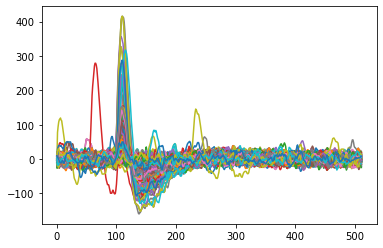


Zoom-in and Analyzed Figure:


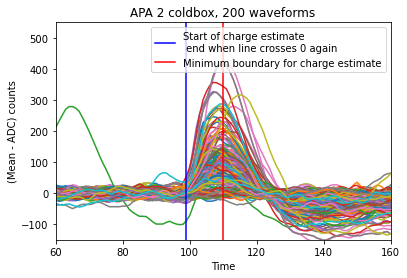


Distribution of charge & Gaussian Fit:


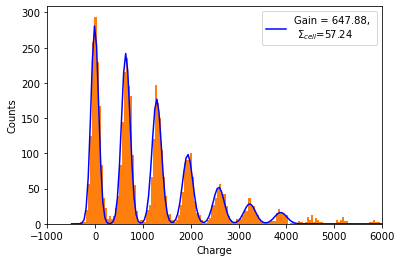

Mean_0:  -8.174016225319829  Gain:  647.8799272415496
Width_0:  113.46742025506485 Sigma_Cell:  57.244840880058256
Amplitudes:  [281.6308509  241.76725245 177.13826323  98.55485583  51.94731552
  28.27815631  16.11420552]

The distribution of end bins of each waveform:


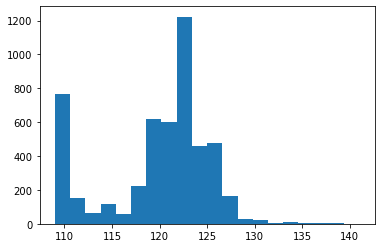

In [63]:
for files in file_list:
#===Read the file========================================
    plt.clf()#refer to notes of python---
    count = 0
    wf = []
    list_wf = []
    f = open(files, 'r')
    for x in f:
        #One wave form is 512 datapoints
        if count<512:
            count += 1
            wf.append(int(x.strip()))#For strip(), refer to P22 of python.pdf---
        if count==512:#The will be executed when each time 512 numbers are read--- 
            count = 0
            mean_wf = np.mean(wf)#For mean(), refer to notes of python---
            list_wf.append([mean_wf - wf[i] for i in range(len(wf))])#For [...], refer to "列表解析" of python.pdf---
            #Pay attention: the element of list_wf is the list!!!---
            wf = []#set zero each time---
    print("Number of waveforms: ", len(list_wf))
    print(files)
#    print([list_wf[i] for i in range(0, 2)])#Added by szhang, to test list_wf[]---

    
    
#===Draw single waveform====================================
    waveform1 = list_wf[0]
    plt.plot(waveform1)
#    plt.xlim(95, 200)#Set the region of x axis---

    
#===Charge Estimates========================================
    t1 = 0
    list_t1 = []
    noise_count = 0
    list_charge = []
    for i in range(len(list_wf)):#i corresponds to single waveform---
        for j in range(110, 150):#j stands for points of each waveform---
            if list_wf[i][j]<0:
                t1 = j-1
                break
        list_t1.append(t1)
        charge = np.sum(list_wf[i][99:t1])#We only focus on points from 99 to the last positive point---
        #According to above figure of single waveform, we know 99 corresponds to the start of the peak---
        #In this sense, above 'charge' tries to integrate the peak---
        #For np.sum(), refer to notes of python---
        list_charge.append(charge)

#===Plot waveforms========================================
    print("\n200 Overlaid Waveforms: ")
    for i in range(200):
        plt.plot([i for i in range(512)], [list_wf[i][j] for j in range(512)])
    plt.show()#This is necessary to avoid new figures from covering old figure---
    
    print("\nZoom-in and Analyzed Figure:")
    for i in range(200):
        plt.plot([i for i in range(512)], [list_wf[i][j] for j in range(512)])
    plt.xlim(60, 160)
    plt.ylim(-150, 550)
    plt.title("APA 2 coldbox, 200 waveforms")
    plt.xlabel("Time")
    plt.ylabel("(Mean - ADC) counts")
    plt.axvline(x=99, color='b', label='Start of charge estimate \n end when line crosses 0 again')#For axvline, refer to ntoes of py---
    plt.axvline(x=110, color='r', label='Minimum boundary for charge estimate')
    #We know the right boundary of charge estimate is determined by whether the entry is smaller than zero---
    #Hence it is different for different waveforms---
    plt.legend( loc='best')#for legend(), refer to notes of python---
    plt.show()#This is necessary to avoid new figures from covering old figure---
    plt.savefig("waveform_noise.png", dpi = 200)

    print("\nDistribution of charge & Gaussian Fit:")
    plt.hist(list_charge, bins=200)#Refer to notes of python---
    guess = [0, 600, 80, 80, 200, 200, 200, 100, 100, 100, 100]
    n, bins, patches = plt.hist(list_charge, bins=200)#This line will draw the hist again---
    plt.xlabel("Charge")
    plt.ylabel("Counts")
    plt.xlim(-1000, 6000)
#    print("n: {}\n bins: {}\n patches: {}".format(n, bins, patches))
    #The above print is dded by szhang, we find n is entries of each bin, bins is the position of each bin---
    popt, pcov = curve_fit(func, bins[:110], n[:110], p0=guess)
    #Here data are bins and n, we only use the first 110 of 200---
    #For meanings of each parameter, refer to notes of python---
#    print("popt: {}\n pcov: {}".format(popt, pcov))
    fit = func(bins, *popt)#The fitted function with good parameters---
    plt.plot(bins, fit, color='b', label=("Gain = %.2f, \n $\Sigma_{cell}$=%.2f"%(popt[1], popt[3])))
    #For more, refer to plt.plot---
    #".2f" means we need float type with two numbers after decimal point---
    #Based on Vikas's pdf and above expression of func, we know p1 and p3 are gain and Sigma_{cell} respectively---
    plt.legend()
    plt.show()
    print("Mean_0: ", popt[0], " Gain: ", popt[1])
    print("Width_0: ", popt[2], "Sigma_Cell: ", popt[3])
    print("Amplitudes: ", popt[4:])
    
    print("\nThe distribution of end bin of each waveform:")
    plt.hist(list_t1, bins=20)